Langzhou map

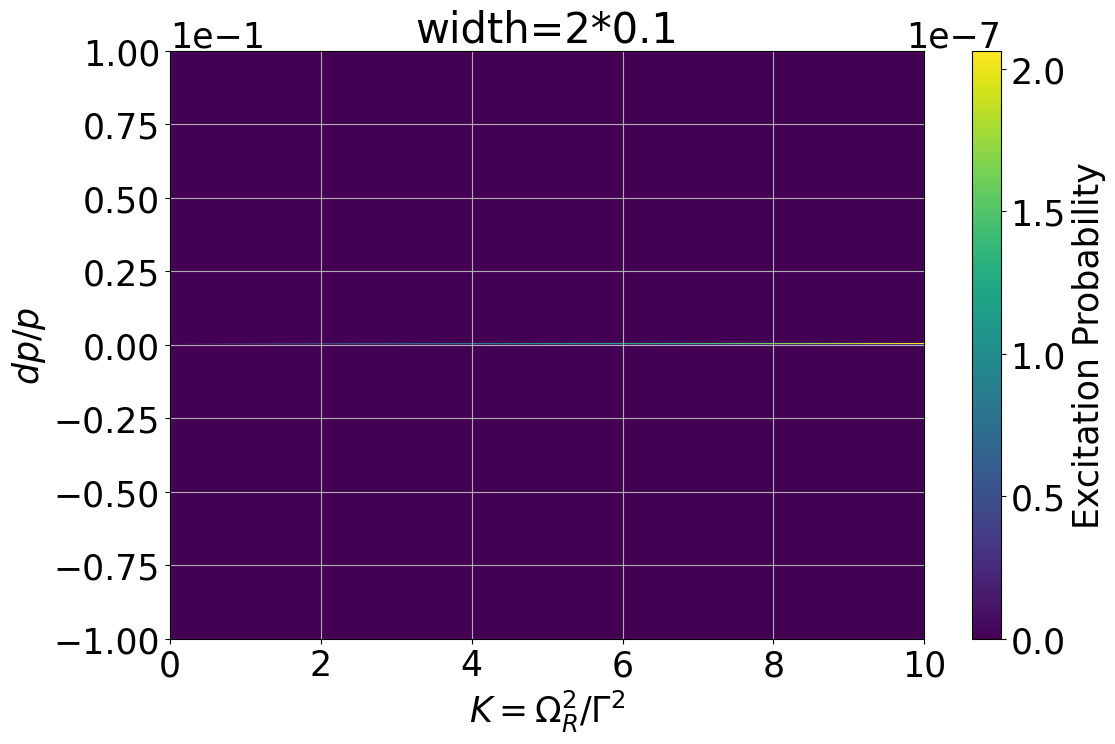

Saved JSON data.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import constants 

C_LIGHT = 2.99792458e8
hbar = 1.054571817e-34#; // J*sec
QELEM = 1.60217663e-19

#plot with dp/p instead of detuning

ion_excited_lifetime=2.44e-9
gamma_decay=1/ion_excited_lifetime
p0c=12400049491.415041
m0=14903905638.72
gamma0=1.3008551033839242
beta0=0.639579302749178


hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
lambda_0 = 103.76*1e-9 # m -- ion excitation wavelength
hw0 = 2*np.pi*hc/lambda_0 # m -- ion excitation wavelength
cos_theta=1
theta_l=0


laser_wavelength=2.2136363636363638e-07
ion_excitation_energy=hw0

axis=1e-1
mid=0


delta_range=np.linspace(mid-axis,mid+axis,600)
K1_range = np.linspace(0, 10, 600)


# Create a grid of K1 and Δ/Γ values
K1_grid, delta_grid = np.meshgrid(K1_range, delta_range)

pc = p0c*(1.0+delta_grid)#; // eV
gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))

laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma

OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)


ratio_ΔΓ_range = DeltaDetuning/gamma_decay


# Calculate the heatmap values using the equation
heatmap_values = 0.5*K1_grid / (4*ratio_ΔΓ_range*ratio_ΔΓ_range + K1_grid + 1)

# Create the heatmap
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
heatmap = plt.imshow(heatmap_values, extent=[K1_range[0], K1_range[-1], delta_range[0], delta_range[-1]],
                     origin='lower', cmap='viridis', aspect='auto')

# plt.axvspan(xmin=6.9, xmax=7.1, color='red', alpha=0.3)
colorbar=plt.colorbar(heatmap)
colorbar.set_label('Excitation Probability')
plt.title(f'width=2*{axis}')
plt.xlabel(r"$K=\Omega^2_{R}/\Gamma^2$")
plt.ylabel(r"$dp/p$")
plt.grid(True)
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.savefig('Excitation_map.png', dpi=300)
# plt.savefig('Excitation_map.eps', dpi=300)
plt.show()

# Define a dictionary to store the data
data = {
    'K1_range': K1_range.tolist(),
    'delta_range': delta_range.tolist(),
    'Excitation probability': heatmap_values.tolist(),
}



# Save data in JSON format
with open('Langzhou.json', 'w') as f:
    json.dump(data, f, indent=1)

print('Saved JSON data.')



4.6524550524550525e-05


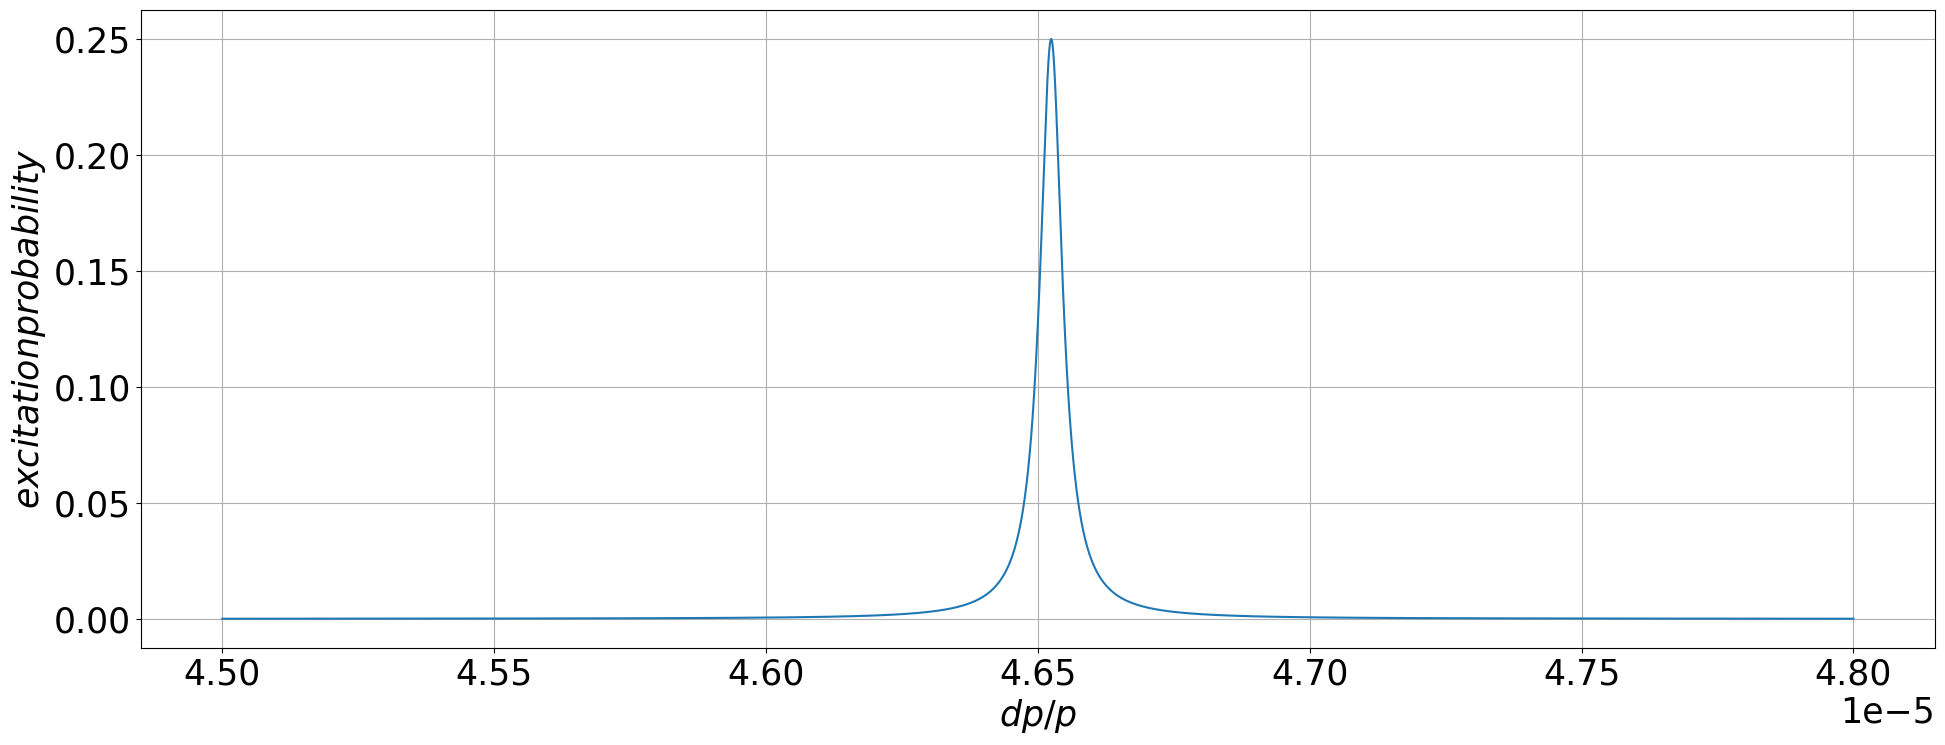

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import constants 

C_LIGHT = 2.99792458e8
hbar = 1.054571817e-34#; // J*sec
QELEM = 1.60217663e-19

#plot with dp/p instead of detuning

ion_excited_lifetime=2.44e-9
gamma_decay=1/ion_excited_lifetime
p0c=12400049491.415041
m0=14903905638.72
gamma0=1.3008551033839242
beta0=0.639579302749178


hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
lambda_0 = 103.76*1e-9 # m -- ion excitation wavelength
hw0 = 2*np.pi*hc/lambda_0 # m -- ion excitation wavelength
cos_theta=1
theta_l=0


laser_wavelength=2.213116311631163e-07
ion_excitation_energy=hw0

axis=1e-1
mid=0


delta_range=np.linspace(mid-axis,mid+axis,int(1e7))
delta_range=np.linspace(4.5e-05,4.8e-5,int(1e6))

K1 = 1


pc = p0c*(1.0+delta_range)#; // eV
gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))

laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma

OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)


ratio_ΔΓ_range = DeltaDetuning/gamma_decay


# Calculate the heatmap values using the equation
excitation_prob = 0.5*K1 / ((4*ratio_ΔΓ_range*ratio_ΔΓ_range + K1 + 1))

max_prob = np.max(excitation_prob)
max_prob_index = np.argmax(excitation_prob)

# Find the corresponding delta value
corresponding_max_delta = delta_range[max_prob_index]

print(corresponding_max_delta)

# Create the heatmap
plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 25})
plt.plot(delta_range,excitation_prob)
# plt.title(f'width=2*{axis}')
plt.xlabel(r"$dp/p$")
plt.ylabel(r"$excitation probability$")
plt.grid(True)
plt.tight_layout()
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()


loop over all wavelengths

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import constants
from tqdm import tqdm 

C_LIGHT = 2.99792458e8
hbar = 1.054571817e-34#; // J*sec
QELEM = 1.60217663e-19

#plot with dp/p instead of detuning

ion_excited_lifetime=2.44e-9
gamma_decay=1/ion_excited_lifetime
p0c=12400049491.415041
m0=14903905638.72
gamma0=1.3008551033839242
beta0=0.639579302749178


hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
lambda_0 = 103.76*1e-9 # m -- ion excitation wavelength
hw0 = 2*np.pi*hc/lambda_0 # m -- ion excitation wavelength
cos_theta=1
theta_l=0


#laser_wavelength=222*1e-9#m
ion_excitation_energy=hw0

axis=1e-1
mid=0

laser_range=np.linspace(215*1e-9,225*1e-9,int(1e2))
delta_range=np.linspace(mid-axis,mid+axis,int(1e7))
K1 = 7

corresponding_max_delta_list=[]

for laser_wavelength in tqdm(laser_range):

    pc = p0c*(1.0+delta_range)#; // eV
    gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
    beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))

    laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma

    OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
    DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)


    ratio_ΔΓ_range = DeltaDetuning/gamma_decay


    # Calculate the heatmap values using the equation
    excitation_prob = 0.5*K1 / (4*ratio_ΔΓ_range*ratio_ΔΓ_range + K1 + 1)

    max_prob = np.max(excitation_prob)
    max_prob_index = np.argmax(excitation_prob)

    # Find the corresponding delta value
    corresponding_max_delta = delta_range[max_prob_index]

    corresponding_max_delta_list.append(corresponding_max_delta)

#np.savez('/home/pkruyt/cernbox/laser_cooling/latex_plots/results', corresponding_max_delta_list=corresponding_max_delta_list,laser_range=laser_range,delta_range=delta_range)

loaded_data = np.load('/home/pkruyt/cernbox/laser_cooling/latex_plots/results.npz')

# Access the individual arrays or variables
corresponding_max_delta_list = loaded_data['corresponding_max_delta_list']
laser_range = loaded_data['laser_range']
delta_range = loaded_data['delta_range']

delta_range.shape

100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


(10000000,)

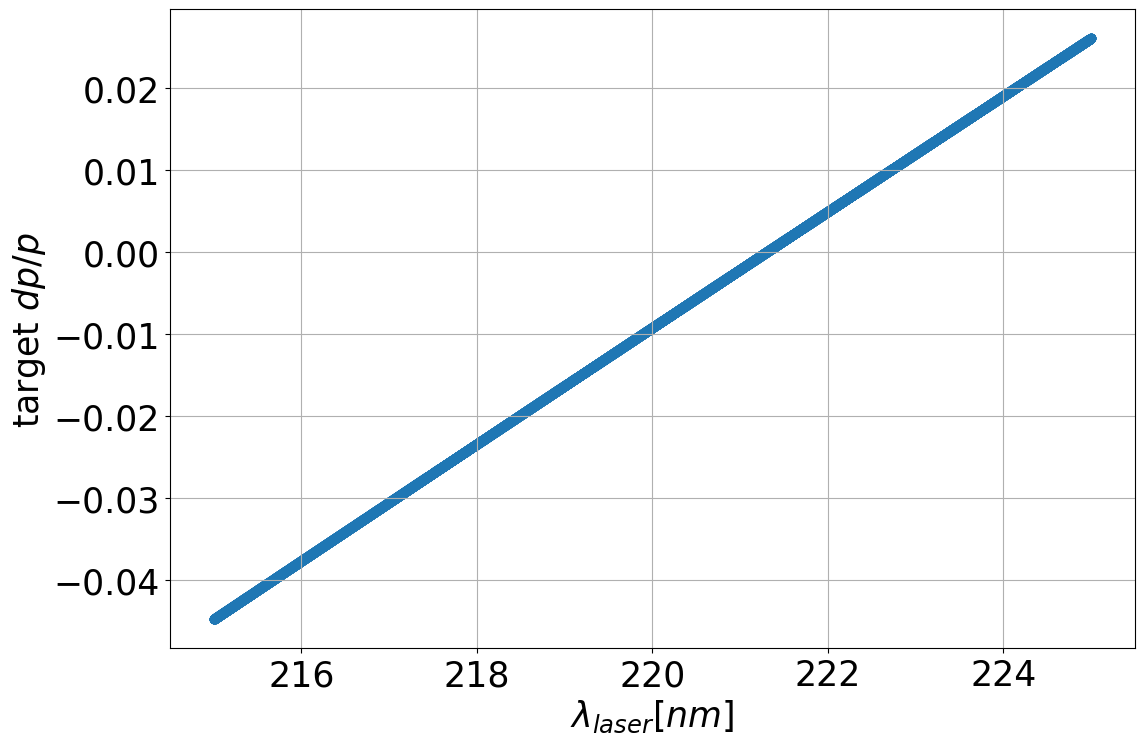

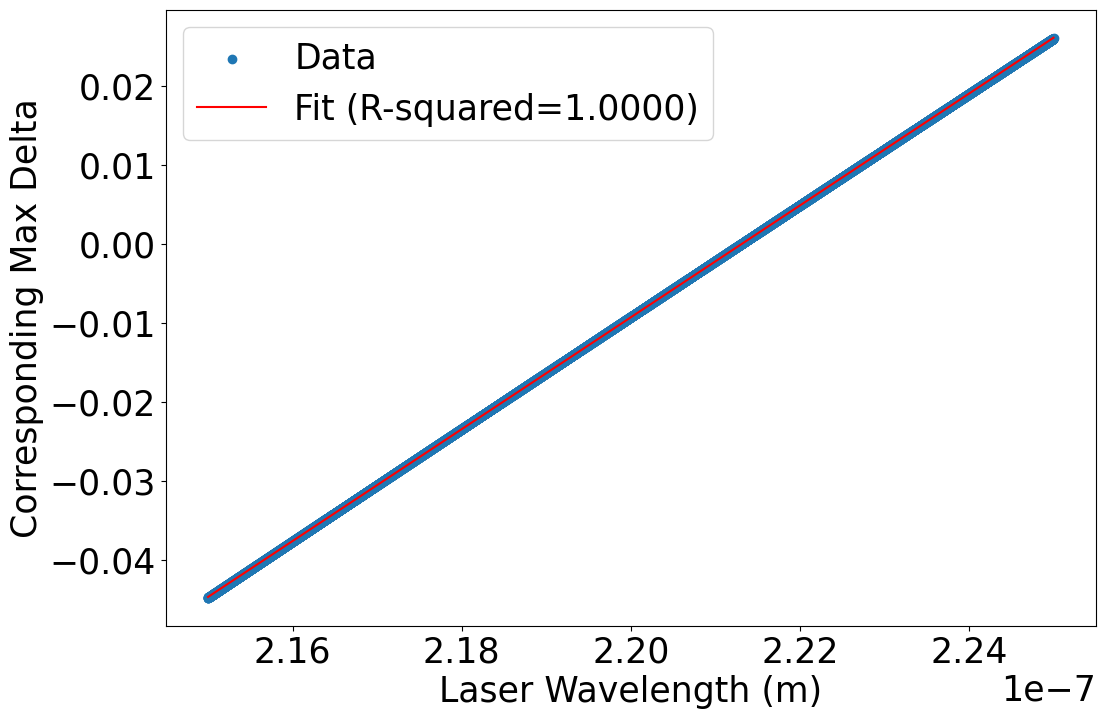

Slope: 7080583.968682445
Intercept: -1.5670073499480257


In [4]:
# Create the heatmap
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.scatter(laser_range*1e9,corresponding_max_delta_list)
plt.xlabel("$\lambda_{laser} [nm]$")
plt.ylabel(r"target $dp/p$")
plt.grid(True)
plt.tight_layout()
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()

#fit straight line
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Convert the data to NumPy arrays
x = np.array(laser_range)
y = np.array(corresponding_max_delta_list)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the fitted values
y_fit = slope * x + intercept

# Plot the data and the fitted line
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.scatter(x, y, label='Data')
plt.plot(x, y_fit, 'r', label=f'Fit (R-squared={r_value**2:.4f})')
plt.xlabel('Laser Wavelength (m)')
plt.ylabel('Corresponding Max Delta')
plt.legend()
plt.show()

# Print the slope and intercept of the fitted line
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')

In [5]:
# Define the desired value of dp/p
desired_dp_over_p = 5e-5

# Find the index where dp/p is closest to the desired value
closest_index = np.argmin(np.abs(np.array(corresponding_max_delta_list) - desired_dp_over_p))

# Find the corresponding laser wavelength
corresponding_wavelength = laser_range[closest_index]
closest_dp_over_p = corresponding_max_delta_list[closest_index]


corresponding_frequency = C_LIGHT / corresponding_wavelength

print(f"Wavelength Corresponding to dp/p = {desired_dp_over_p}:", corresponding_wavelength)
print(f"Closest dp/p to {desired_dp_over_p}:", closest_dp_over_p)
print(f"Corresponding Frequency: {corresponding_frequency} Hz")


Wavelength Corresponding to dp/p = 5e-05: 2.213116311631163e-07
Closest dp/p to 5e-05: 4.653000465298929e-05
Corresponding Frequency: 1354616819840977.5 Hz


In [6]:
# Define the Corresponding Max Delta value you want to find the wavelength for
desired_delta = 5e-5

# Calculate the corresponding Laser Wavelength
corresponding_wavelength = (desired_delta - intercept) / slope

corresponding_frequency = C_LIGHT / corresponding_wavelength

# Print the result
print(f"Laser Wavelength for Corresponding Max Delta {desired_delta}: {corresponding_wavelength} m")
print(f"Corresponding Frequency: {corresponding_frequency} Hz")


Laser Wavelength for Corresponding Max Delta 5e-05: 2.21317529299723e-07 m
Corresponding Frequency: 1354580719153072.8 Hz


Top edge

In [7]:
# linewidth_freq=1e6 #Hz
# freq_total=corresponding_frequency+0*linewidth_freq

# print(f"Corresponding Frequency - linewidth: {freq_total} Hz")


# wavelength_edge=C_LIGHT/freq_total

# # Calculate the Corresponding Max Delta (y) using the linear fit equation
# corresponding_dp_p_edge = slope * wavelength_edge + intercept

# # print(f"Edge wavelength: {wavelength_edge} m")

# # print(f"difference edge and centre wavelength: {corresponding_wavelength-wavelength_edge} m")

# # # Find the index of the edge wavelength in the laser_range
# # edge_wavelength_index = np.argmin(np.abs(np.array(laser_range) - wavelength_edge))

# # # Find the corresponding dp/p value for the edge wavelength
# # corresponding_dp_p_edge = corresponding_max_delta_list[edge_wavelength_index]

# print(f"Corresponding dp/p for Edge Wavelength: {corresponding_dp_p_edge}")


Bottom edge

In [8]:
# linewidth_freq=1e6 #Hz
# freq_total=corresponding_frequency-linewidth_freq

# print(f"Corresponding Frequency - linewidth: {freq_total} Hz")


# wavelength_edge=C_LIGHT/freq_total

# # Calculate the Corresponding Max Delta (y) using the linear fit equation
# corresponding_dp_p_edge = slope * wavelength_edge + intercept

# # print(f"Edge wavelength: {wavelength_edge} m")

# # print(f"difference edge and centre wavelength: {corresponding_wavelength-wavelength_edge} m")

# # # Find the index of the edge wavelength in the laser_range
# # edge_wavelength_index = np.argmin(np.abs(np.array(laser_range) - wavelength_edge))

# # # Find the corresponding dp/p value for the edge wavelength
# # corresponding_dp_p_edge = corresponding_max_delta_list[edge_wavelength_index]

# print(f"Corresponding dp/p for Edge Wavelength: {corresponding_dp_p_edge}")
# print(f"Difference dp/p between center and edge: {corresponding_dp_p_edge-5e-5}")

Eidam FWHM equation

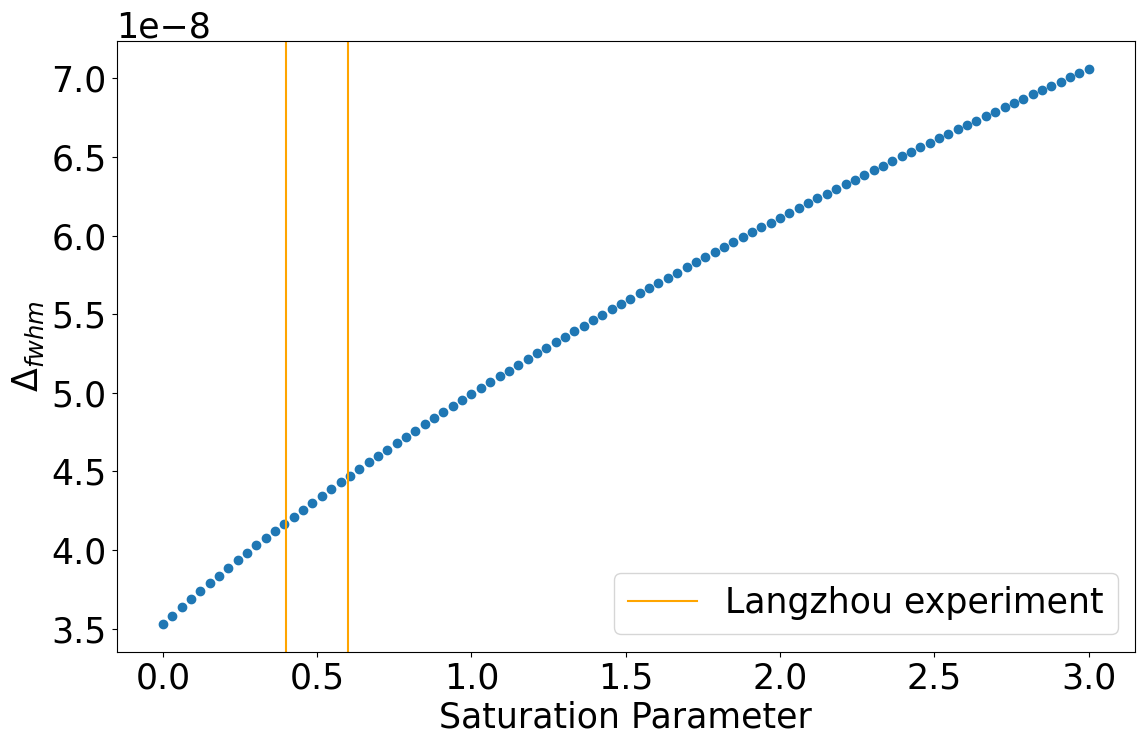

Closest Delta_fwhm to saturation_parameter = 8.7: 7.059729866417754e-08
Closest Delta_fwhm to saturation_parameter = 0.51: 4.43101060785433e-08


In [23]:
laser_wavelength = 2.213116311631163e-07
saturation_parameter=np.linspace(0,3,100)
# Calculate the expression
delta_fwhm = (np.sqrt(1 + saturation_parameter) * laser_wavelength) / (2 * np.pi * (ion_excited_lifetime) * (1 + beta0) * beta0 * gamma0 * C_LIGHT)



# Create the heatmap
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.scatter(saturation_parameter,delta_fwhm)
plt.xlabel("Saturation Parameter")
plt.ylabel("$\Delta_{fwhm}$")
# plt.axvline(8.6,color='red')
# plt.axvline(8.8,color='red',label='')
plt.axvline(0.6,color='orange',label='Langzhou experiment')
plt.axvline(0.4,color='orange')
plt.legend()
plt.tight_layout()
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()

# Find the index of the closest value to 8.7 in saturation_parameter
closest_index = np.argmin(np.abs(saturation_parameter - 8.7))
result = delta_fwhm[closest_index]
closest_saturation_parameter = saturation_parameter[closest_index]

k1=0.564690

closest_index2 = np.argmin(np.abs(saturation_parameter - k1))
result2 = delta_fwhm[closest_index2]
closest_saturation_parameter = saturation_parameter[closest_index2]

k1=0.564690

print("Closest Delta_fwhm to saturation_parameter = 8.7:", result)
print("Closest Delta_fwhm to saturation_parameter = 0.51:", result2)


map slices

lorentzian width: 8.646408646408797e-08
lorentzian width: 1.2227812227812043e-07
lorentzian width: 1.8678218678218328e-07
lorentzian width: 2.1179221179220794e-07


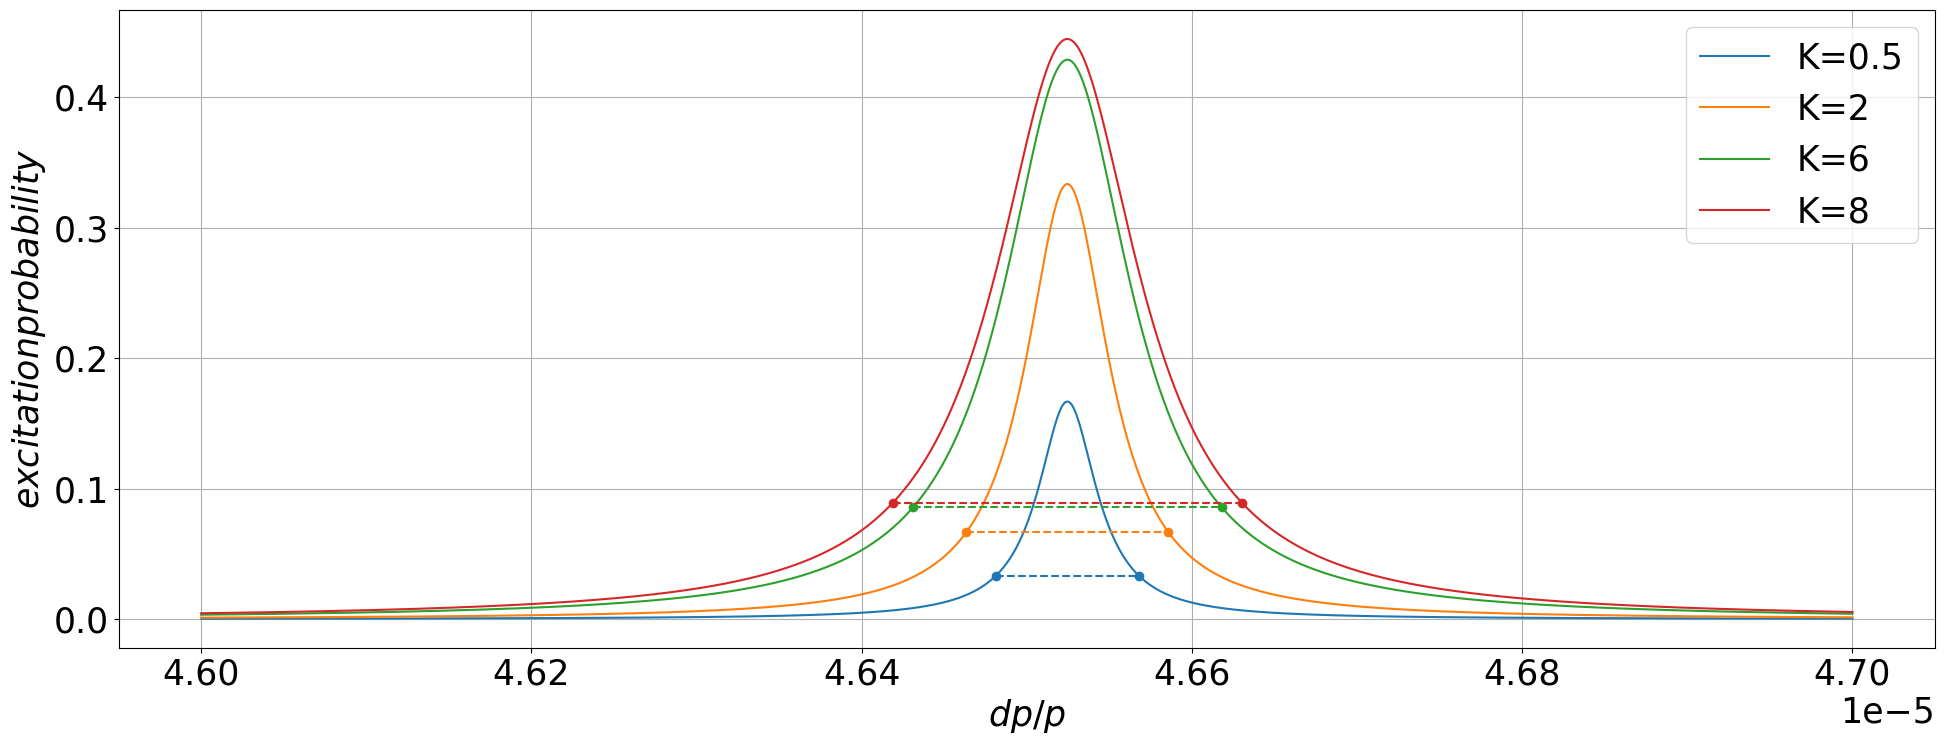

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import constants 

C_LIGHT = 2.99792458e8
hbar = 1.054571817e-34#; // J*sec
QELEM = 1.60217663e-19

#plot with dp/p instead of detuning

ion_excited_lifetime=2.44e-9
gamma_decay=1/ion_excited_lifetime
p0c=12400049491.415041
m0=14903905638.72
gamma0=1.3008551033839242
beta0=0.639579302749178


hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
lambda_0 = 103.76*1e-9 # m -- ion excitation wavelength
hw0 = 2*np.pi*hc/lambda_0 # m -- ion excitation wavelength
cos_theta=1
theta_l=0


laser_wavelength=2.21317529299723e-07
# laser_wavelength=2.213116311631163e-07
laser_wavelength=2.213116311631163e-07
ion_excitation_energy=hw0

delta_range=np.linspace(4.6e-05,4.7e-5,int(1e6))

#saturation_parameter_list=[1,5,10]
saturation_parameter_list=[0.5,2,6,8]
# saturation_parameter_list=[10]
lorentzian_width_list=[]
colors = ['b', 'r', 'g']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 25})
for i, K1 in enumerate(saturation_parameter_list):

    delta_fwhm = (np.sqrt(1 + K1) * laser_wavelength) / (2 * np.pi * (ion_excited_lifetime) * (1 + beta0) * beta0 * gamma0 * C_LIGHT)

    pc = p0c*(1.0+delta_range)#; // eV
    gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
    beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))

    laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma

    OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
    DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)


    ratio_ΔΓ_range = DeltaDetuning/gamma_decay

    # Calculate the heatmap values using the equation
    excitation_prob = 0.5*K1 / (4*ratio_ΔΓ_range*ratio_ΔΓ_range + K1 + 1)

    max_prob = np.max(excitation_prob)
    max_prob_index = np.argmax(excitation_prob)

    # Find the corresponding delta value
    corresponding_max_delta = delta_range[max_prob_index]

    #print(corresponding_max_delta)

    top_index = np.argmin(np.abs(delta_range - (corresponding_max_delta + delta_fwhm)))
    top_delta = delta_range[top_index]

    bottom_index = np.argmin(np.abs(delta_range - (corresponding_max_delta - delta_fwhm)))
    bottom_delta = delta_range[bottom_index]

    lorentzian_width=top_delta-bottom_delta

    print('lorentzian width:',lorentzian_width)

    lorentzian_width_list.append(lorentzian_width)
    
    plt.plot(delta_range,excitation_prob,label=f'K={K1}',color=colors[i])
    plt.scatter(top_delta, excitation_prob[top_index], color=colors[i])
    plt.scatter(bottom_delta, excitation_prob[bottom_index], color=colors[i])
    plt.hlines(y=excitation_prob[bottom_index], xmin=bottom_delta, xmax=top_delta, colors=colors[i], linestyle='--')
    # plt.title(f'width=2*{axis}')
    plt.xlabel(r"$dp/p$")
    plt.ylabel(r"$excitation probability$")
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    # plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()


In [11]:
laser_power=40*1e-3
laser_waist_radius = 1*1e-3
laser_area=np.pi*(laser_waist_radius*laser_waist_radius)

laser_waist_radius = 1000*1e-3
laser_intensity=200000
laser_intensity=laser_power/laser_area

print(laser_intensity)

12732.395447351628
